In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Num of admits per university
- Average GRE and TOEFL score for top universities
- Distribution of industry and research experience
- CGPA distribution and importance
- Top majors

In [2]:
df = pd.read_csv('../datasets/admission_data_cleaned.csv')
df.head()

,major,researchExp,industryExp,toeflScore,greV,greQ,greA,univName,cgpaNorm
0,(MIS / MSIM / MSIS / MSIT),0,66,94.0,146.0,157.0,3.0,Worcester Polytechnic Institute,0.7828
1,MIS,0,0,81.0,148.0,161.0,2.5,Worcester Polytechnic Institute,0.5700
2,MIS,0,0,104.0,150.0,161.0,4.5,Worcester Polytechnic Institute,0.6220
3,MIS-management related courses,0,0,95.0,147.0,156.0,3.0,Worcester Polytechnic Institute,0.5200
4,MIS,0,0,101.0,152.0,158.0,3.0,Worcester Polytechnic Institute,0.6400


In [3]:
df['univName'].nunique()

52

<AxesSubplot:xlabel='univName'>

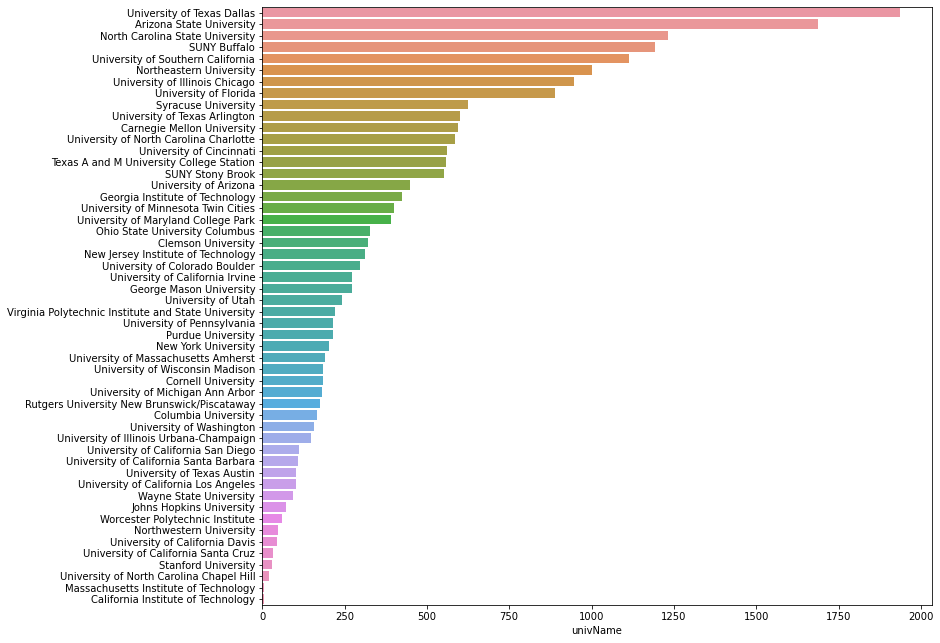

In [4]:
admits = df['univName'].value_counts()
plt.figure(figsize=(12,11))
sns.barplot(x=admits, y=admits.index)

University of Texas Dallas has the most number of admits

In [5]:
avg_scores = df.groupby('univName')[['greQ', 'greV', 'greA', 'toeflScore', 'cgpaNorm']].mean()
avg_scores['gre'] = avg_scores['greQ'] + avg_scores['greV']

In [6]:
avg_scores[['gre', 'toeflScore']].sort_values(['gre', 'toeflScore'], ascending=False).head(10)

,gre,toeflScore
univName,,
Stanford University,326.500000,111.633333
Massachusetts Institute of Technology,324.800000,102.200000
University of Texas Austin,324.346154,110.423077
Georgia Institute of Technology,324.163121,111.075650
California Institute of Technology,323.800000,101.600000
University of California San Diego,323.522124,109.867257
Columbia University,323.448485,110.551515
University of California Los Angeles,323.432692,109.846154
University of North Carolina Chapel Hill,323.350000,111.200000


In [7]:
avg_scores[['gre', 'cgpaNorm']].sort_values(['gre', 'cgpaNorm'], ascending=False).head(10)

,gre,cgpaNorm
univName,,
Stanford University,326.500000,0.872277
Massachusetts Institute of Technology,324.800000,0.878200
University of Texas Austin,324.346154,0.878451
Georgia Institute of Technology,324.163121,0.807155
California Institute of Technology,323.800000,0.692200
University of California San Diego,323.522124,0.852940
Columbia University,323.448485,0.801787
University of California Los Angeles,323.432692,0.838928
University of North Carolina Chapel Hill,323.350000,0.835365


Top universities like Standford and MIT require GRE of around 325, TOEFL of 100+, and normalized CGPA of 8+

<AxesSubplot:xlabel='industryExp', ylabel='Count'>

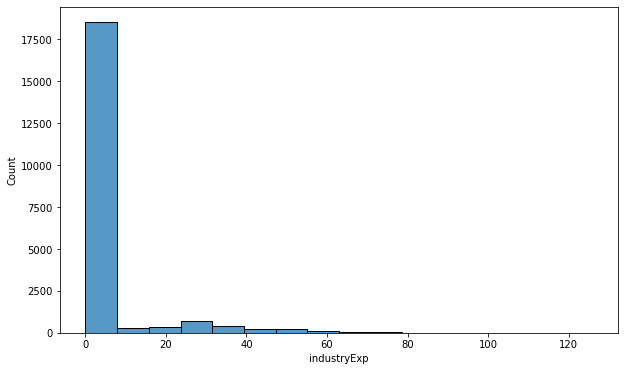

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(x='industryExp', data=df)

<AxesSubplot:xlabel='researchExp', ylabel='Count'>

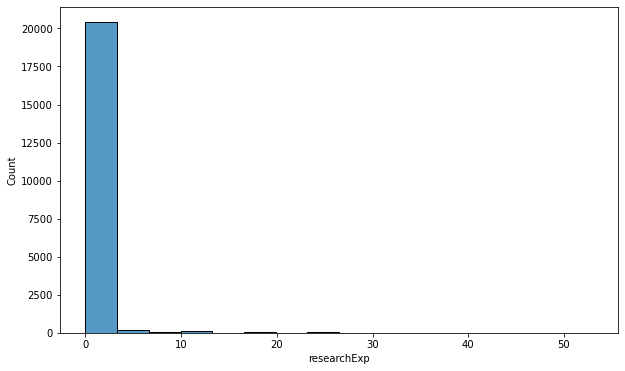

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(x='researchExp', data=df)

Most admitted applicants didn't have any industry or research experience

Most admitted applicants didn't have any journal publications

<AxesSubplot:>

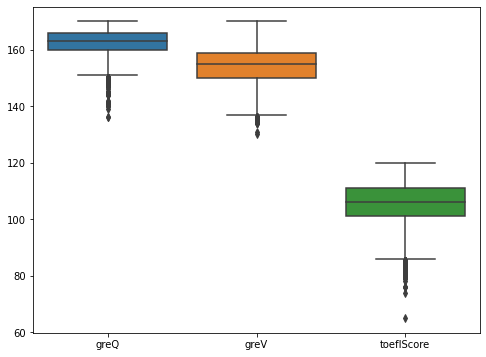

In [10]:
plt.figure(figsize=(8,6))
test_scores = df[['greQ', 'greV', 'toeflScore']]
sns.boxplot(data=test_scores)

On average, people score higher in Quants section of GRE compared to Verbal

<AxesSubplot:xlabel='cgpaNorm', ylabel='Count'>

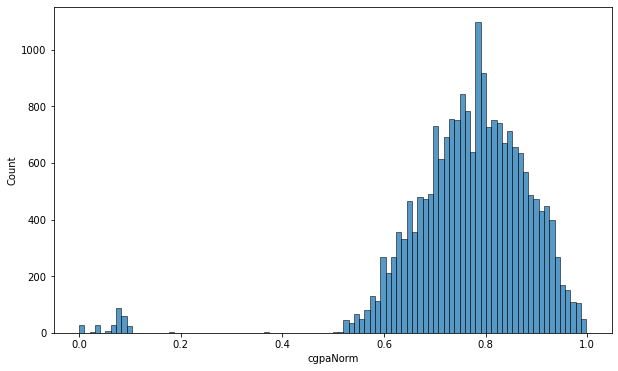

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(x='cgpaNorm', data=df)

CGPA is normally distributed with mean around 8

<AxesSubplot:ylabel='cgpaNorm'>

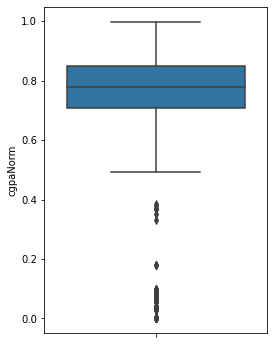

In [12]:
plt.figure(figsize=(4,6))
sns.boxplot(y='cgpaNorm', data=df)

In [13]:
df['major'].nunique()

35

<AxesSubplot:xlabel='major'>

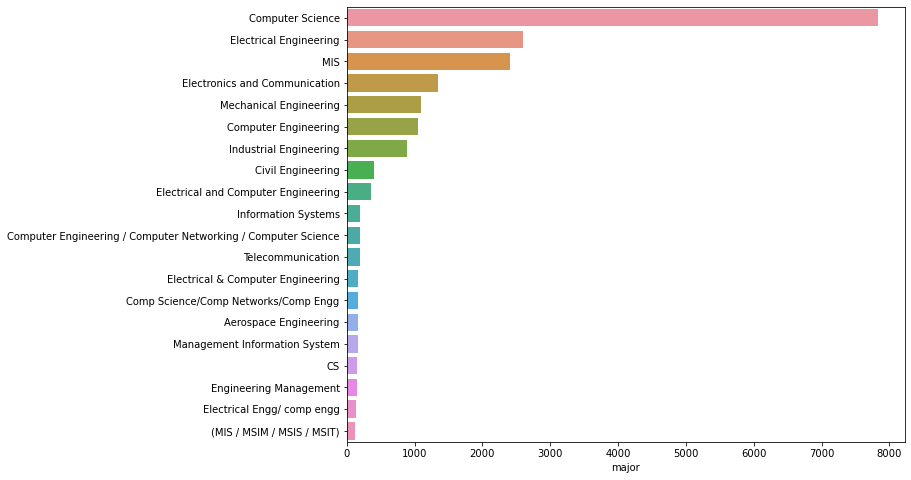

In [14]:
majors = df['major'].value_counts().head(20)
plt.figure(figsize=(10,8))
sns.barplot(x=majors, y=majors.index)

Computer and Electrical engineering related fields are popular

We won't use the major column as it has many unique values. Also admission chance prediction model does not require major information as well

In [15]:
df = df.drop(['major'], axis=1)

#### CGPA, GRE, TOEFL scores are most important factors for getting admits in US universities.

### Making sure universities name are compatible with the top 300 universities table

In [16]:
top_df = pd.read_csv('../datasets/universities_data_300.csv')
top_df.head()

,name,tuition,rank,acceptance,website,location
0,Princeton University,"$47,140",1,7%,http://www.princeton.edu,"Princeton, NJ"
1,Harvard University,"$50,420",2,5%,http://www.harvard.edu,"Cambridge, MA"
2,Columbia University,"$59,430",3,7%,http://www.columbia.edu,"New York, NY"
3,Massachusetts Institute of Technology,"$51,832",4,8%,http://web.mit.edu/,"Cambridge, MA"
4,University of Chicago,"$57,006",5,8%,http://www.uchicago.edu,"Chicago, IL"


Finding universities whose name does not match any top 300 university

In [17]:
top_300 = [x.replace("--", " ").lower() for x in top_df['name'].unique()]
unis = [x.lower() for x in df['univName'].unique()]
extras = list(set(unis) - set(top_300))
extras

['virginia polytechnic institute and state university',
 'north carolina state university',
 'suny stony brook',
 'rutgers university new brunswick/piscataway',
 'texas a and m university college station',
 'purdue university',
 'suny buffalo',
 'arizona state university']

Renaming universities to be in sync with top 300 univeristies

In [18]:
df[df['univName'].str.lower() == 'north carolina state university']

,researchExp,industryExp,toeflScore,greV,greQ,greA,univName,cgpaNorm
15387,0,26,109.0,145.0,168.0,3.0,North Carolina State University,0.8970
15388,0,0,109.0,160.0,159.0,3.0,North Carolina State University,0.8600
15389,0,0,117.0,155.0,163.0,4.0,North Carolina State University,0.7200
15390,0,0,112.0,157.0,165.0,3.5,North Carolina State University,0.7300
15391,0,0,118.0,155.0,170.0,4.0,North Carolina State University,0.9950
...,...,...,...,...,...,...,...,...
16615,0,0,119.0,170.0,164.0,6.0,North Carolina State University,0.8000
16616,0,48,108.0,154.0,163.0,3.5,North Carolina State University,0.8280
16617,0,0,106.0,151.0,159.0,3.5,North Carolina State University,0.8724
16618,0,0,96.0,158.0,166.0,3.0,North Carolina State University,0.7770


In [19]:
old_to_new = {
    "North Carolina State University": "North Carolina State University Raleigh",
    "Texas A and M University College Station": "Texas A&M University College Station",
    "Virginia Polytechnic Institute and State University": "Virginia Tech",
    "Purdue University": "Purdue University West Lafayette",
    "SUNY Buffalo": "University at Buffalo SUNY",
    "Arizona State University": "Arizona State University Tempe",
    "SUNY Stony Brook": "Stony Brook University SUNY",
    "Rutgers University New Brunswick/Piscataway": "Rutgers University New Brunswick"
}

df['univName'] = df['univName'].replace(old_to_new.keys(), old_to_new.values())

In [20]:
top_300 = [x.replace("--", " ").lower() for x in top_df['name'].unique()]
unis = [x.lower() for x in df['univName'].unique()]
extras = list(set(unis) - set(top_300))
extras

[]

In [21]:
df.to_csv('../datasets/final_admission_data.csv', index=False)